In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv('crime_regression_data.csv', index_col=['zipcode'])

In [3]:
# Scale the dataset and compute the correlation matrix

selected_cols = ['businesses', 'hpdA', 'hpdB', 'hpdC','hpdTotal', 'positiveRodent', 'negativeRodent', 'population']
df1 = df[selected_cols].dropna()

for col in selected_cols: 
    df1[col] = df1[col] / df1['population']

del df1['population']
df1_scaled = preprocessing.scale(df1)
df1_new = pd.DataFrame(data=df1_scaled, columns = df1.columns)
corr = df1_new.corr()
corr.to_csv('corr.csv')

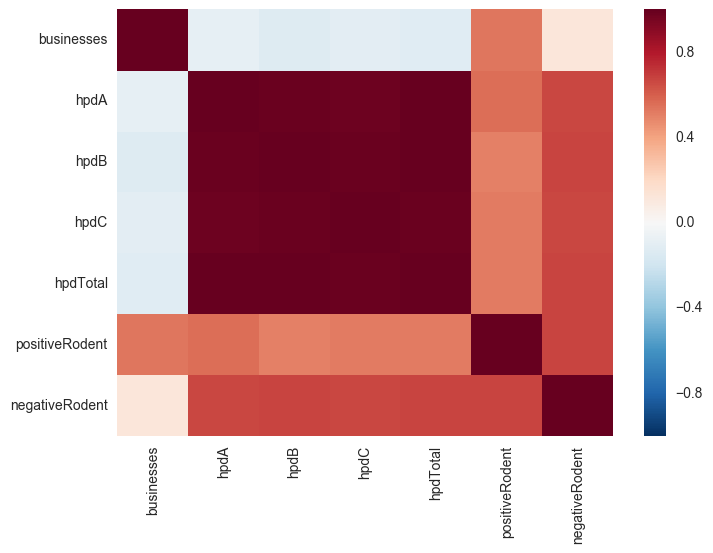

In [4]:
sns.set()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

In [5]:
df_cleaned = df1[['businesses', 'hpdTotal', 'positiveRodent']]
df_cleaned.head()

,businesses,hpdTotal,positiveRodent
zipcode,,,
10453,0.005822,0.782664,0.305568
10457,0.006807,0.791145,0.438391
10460,0.005828,0.635076,0.297745
10458,0.006873,0.743615,0.371441
10467,0.006402,0.539283,0.133101


In [6]:
# Calculate VIF (a measure for collinearity)
temp = df_cleaned.as_matrix()
vif = [variance_inflation_factor(temp, i) for i in range(temp.shape[1])]
print(vif)

[2.3989289029653116, 2.3278707218538313, 4.279668601567332]


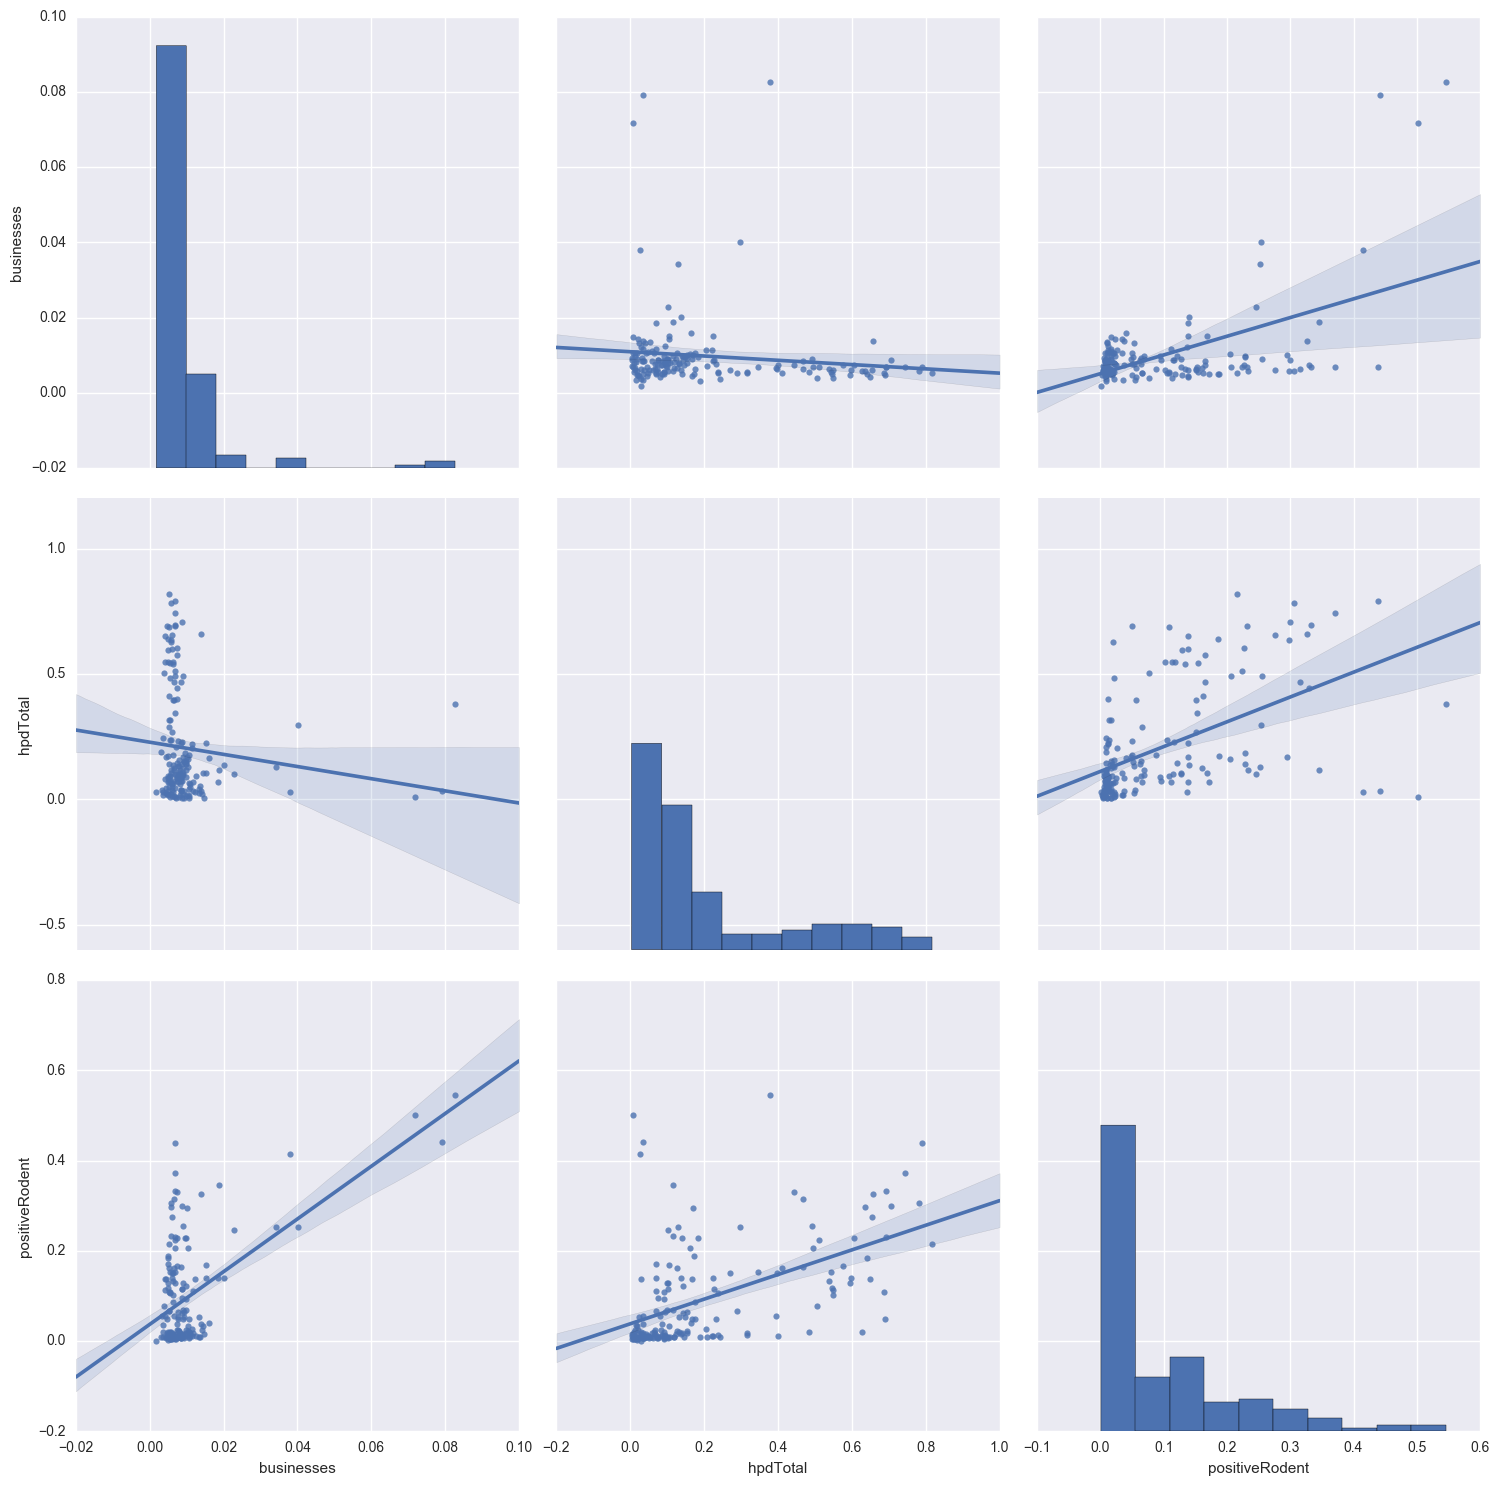

In [7]:
sns.pairplot(df_cleaned, size=5, kind='reg', diag_kind='hist')
plt.show()

In [8]:
# Get summary statistics

basic_summary = df_cleaned.dropna().describe()
basic_summary = basic_summary.applymap('{:.2f}'.format)
basic_summary

,businesses,hpdTotal,positiveRodent
count,170.00,170.00,170.00
mean,0.01,0.20,0.09
std,0.01,0.22,0.11
min,0.00,0.00,0.00
25%,0.01,0.05,0.01
50%,0.01,0.11,0.04
75%,0.01,0.26,0.14
max,0.08,0.82,0.55


## By Population

In [9]:
selected_cols = ['businesses', 'hpdTotal', 'positiveRodent', 'negativeRodent',\
                'population', 'violation', 'misdemeanor', 'felony', 'total', 'theft',\
                'assault', 'harassment', 'boro']
df3 = df[selected_cols].dropna()
cols = ['businesses', 'hpdTotal', 'positiveRodent', 'negativeRodent', 'felony', 'misdemeanor', 'violation', 
       'total']

for col in cols: 
    df3[col] = df3[col] / df3['population']
df3.head()

,businesses,hpdTotal,positiveRodent,negativeRodent,population,violation,misdemeanor,felony,total,theft,assault,harassment,boro
zipcode,,,,,,,,,,,,,
10453,0.005822,0.782664,0.305568,0.096099,76775.0,0.097870,0.482071,0.183054,0.762996,5745.0,8058.0,7409.0,Bronx
10457,0.006807,0.791145,0.438391,0.175139,69048.0,0.111270,0.611575,0.249479,0.972324,6928.0,9025.0,7631.0,Bronx
10460,0.005828,0.635076,0.297745,0.098069,53707.0,0.105703,0.595677,0.258458,0.959838,5491.0,6581.0,5527.0,Bronx
10458,0.006873,0.743615,0.371441,0.134391,77840.0,0.094116,0.536922,0.257143,0.888181,9093.0,8358.0,7217.0,Bronx
10467,0.006402,0.539283,0.133101,0.068729,94342.0,0.091751,0.393133,0.195385,0.680270,7209.0,7743.0,8542.0,Bronx


In [10]:
df_cleaned = df3[['boro', 'businesses', 'hpdTotal', 'positiveRodent']]
revised_df = pd.melt(df_cleaned, id_vars='boro', value_vars=list(df_cleaned.columns[1:]),
            var_name='Feature', value_name='Count')
revised_df.head()

,boro,Feature,Count
0,Bronx,businesses,0.005822
1,Bronx,businesses,0.006807
2,Bronx,businesses,0.005828
3,Bronx,businesses,0.006873
4,Bronx,businesses,0.006402


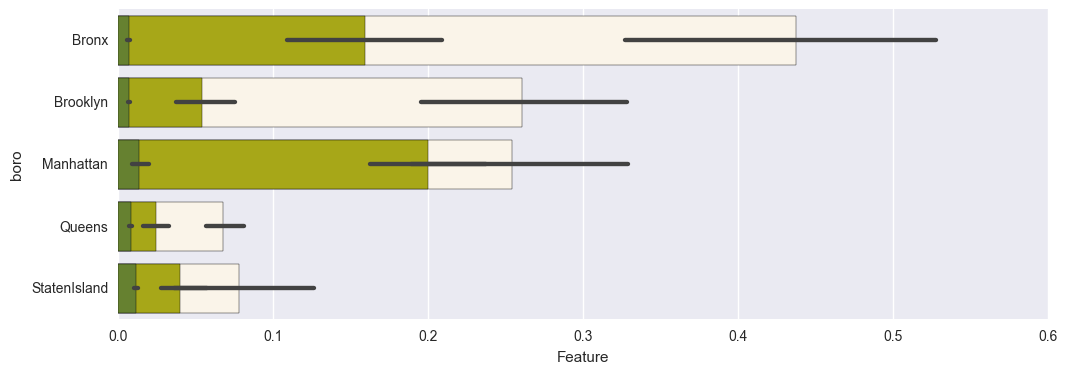

In [11]:
f, ax = plt.subplots(figsize=(12, 4))
sns.barplot(y='boro', x='hpdTotal', data=df_cleaned, label='hpdTotal', color='oldlace')
sns.barplot(y='boro', x='positiveRodent', data=df_cleaned, label='positiveRodent', color='y')
sns.barplot(y='boro', x='businesses', data=df_cleaned, label='businesses', color='olivedrab')
ax.set_xlabel('Feature')
plt.show()

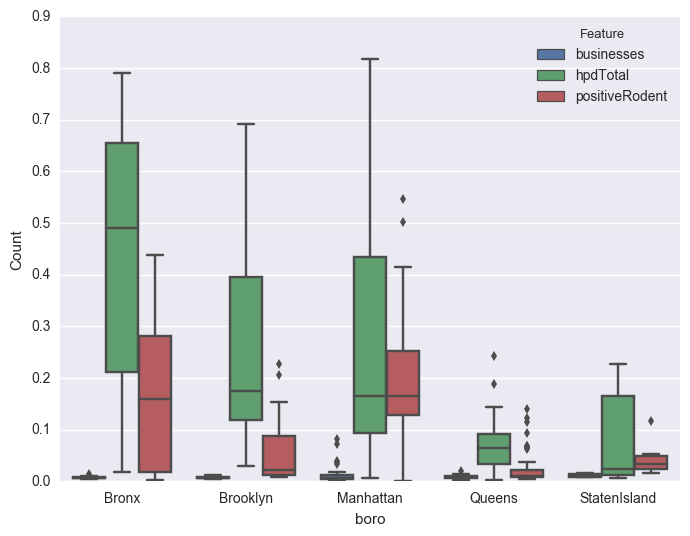

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='boro', y='Count', hue='Feature', data=revised_df)
plt.show()

In [13]:
# Normalize data
Y = ['total']
df3 = df3.drop(['boro'], axis=1)
df3_new = pd.DataFrame(np.c_[preprocessing.scale(df3.drop(Y, 1)), df3[Y]], index=df3.index, columns = df3.columns)
df3_new.head()

,businesses,hpdTotal,positiveRodent,negativeRodent,population,violation,misdemeanor,felony,total,theft,assault,harassment
zipcode,,,,,,,,,,,,
10453,-0.382933,2.647876,1.931112,2.082262,1.144432,0.229534,0.253360,-0.153248,0.369129,2.011236,1.694863,0.762996
10457,-0.274087,2.686942,3.132514,4.711441,0.837707,0.451681,0.619583,0.148805,0.741841,2.399995,1.792188,0.972324
10460,-0.382301,1.968089,1.860351,2.147797,0.228740,0.359386,0.574625,0.189637,0.289105,1.417443,0.869796,0.959838
10458,-0.266768,2.468020,2.526946,3.356005,1.186708,0.167295,0.408473,0.183656,1.423940,2.131844,1.610690,0.888181
10467,-0.318815,1.526870,0.371114,1.171819,1.841761,0.128090,0.001854,-0.097177,0.830372,1.884597,2.191569,0.680270


In [14]:
model = ols("total ~ businesses + hpdTotal + positiveRodent + negativeRodent", df3_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     8.119
Date:                Wed, 10 May 2017   Prob (F-statistic):           5.47e-06
Time:                        14:19:58   Log-Likelihood:                -220.29
No. Observations:                 166   AIC:                             450.6
Df Residuals:                     161   BIC:                             466.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       7.633e-17      0.072   1.06e

In [15]:
model = ols("total ~ businesses + hpdTotal + positiveRodent", df3_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     10.84
Date:                Wed, 10 May 2017   Prob (F-statistic):           1.58e-06
Time:                        14:19:58   Log-Likelihood:                -220.36
No. Observations:                 166   AIC:                             448.7
Df Residuals:                     162   BIC:                             461.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       7.633e-17      0.072   1.06e

In [16]:
model = ols("felony ~ businesses + hpdTotal + positiveRodent", df3_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 felony   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     264.1
Date:                Wed, 10 May 2017   Prob (F-statistic):           3.85e-62
Time:                        14:19:58   Log-Likelihood:                -88.354
No. Observations:                 166   AIC:                             184.7
Df Residuals:                     162   BIC:                             197.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       1.388e-17      0.032   4.29e

In [17]:
model = ols("misdemeanor ~ businesses + hpdTotal + positiveRodent", df3_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            misdemeanor   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     231.1
Date:                Wed, 10 May 2017   Prob (F-statistic):           2.68e-58
Time:                        14:19:58   Log-Likelihood:                -97.431
No. Observations:                 166   AIC:                             202.9
Df Residuals:                     162   BIC:                             215.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept      -9.714e-17      0.034  -2.84e

In [18]:
model = ols("violation ~ businesses + hpdTotal + positiveRodent", df3_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              violation   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     86.04
Date:                Wed, 10 May 2017   Prob (F-statistic):           2.41e-33
Time:                        14:19:58   Log-Likelihood:                -156.45
No. Observations:                 166   AIC:                             320.9
Df Residuals:                     162   BIC:                             333.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept      -8.327e-17      0.049  -1.71e

In [19]:
model = ols("theft ~ businesses + hpdTotal + positiveRodent", df3_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  theft   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     51.81
Date:                Wed, 10 May 2017   Prob (F-statistic):           1.56e-23
Time:                        14:19:58   Log-Likelihood:                -179.71
No. Observations:                 166   AIC:                             367.4
Df Residuals:                     162   BIC:                             379.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept      -6.245e-17      0.056  -1.11e

In [20]:
model = ols("assault ~ businesses + hpdTotal + positiveRodent", df3_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                assault   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     31.06
Date:                Wed, 10 May 2017   Prob (F-statistic):           6.45e-16
Time:                        14:19:58   Log-Likelihood:                -197.83
No. Observations:                 166   AIC:                             403.7
Df Residuals:                     162   BIC:                             416.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept      -4.857e-17      0.063  -7.76e

In [21]:
model = ols("harassment ~ businesses + hpdTotal + positiveRodent", df3_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             harassment   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     250.6
Date:                Wed, 10 May 2017   Prob (F-statistic):           1.29e-60
Time:                        14:19:58   Log-Likelihood:                -13.231
No. Observations:                 166   AIC:                             34.46
Df Residuals:                     162   BIC:                             46.91
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          0.6933      0.021     33.

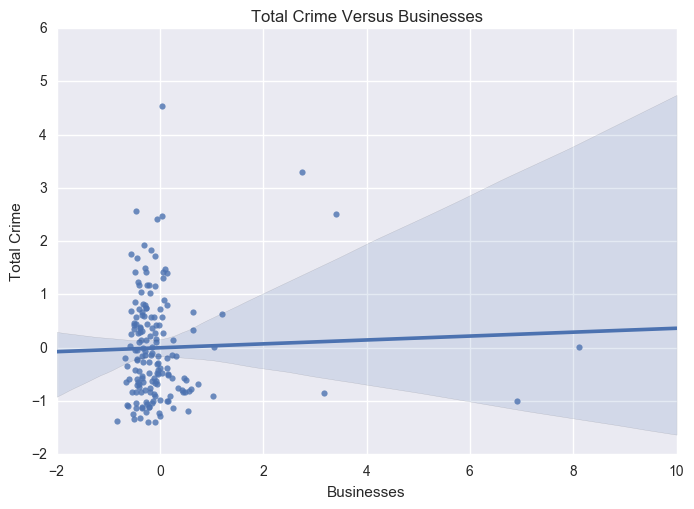

In [22]:
ax = sns.regplot(x='businesses', y='total', data=df3_new)
ax.set_xlabel('Businesses')
ax.set_ylabel('Total Crime')
ax.set_title('Total Crime Versus Businesses')
plt.show()

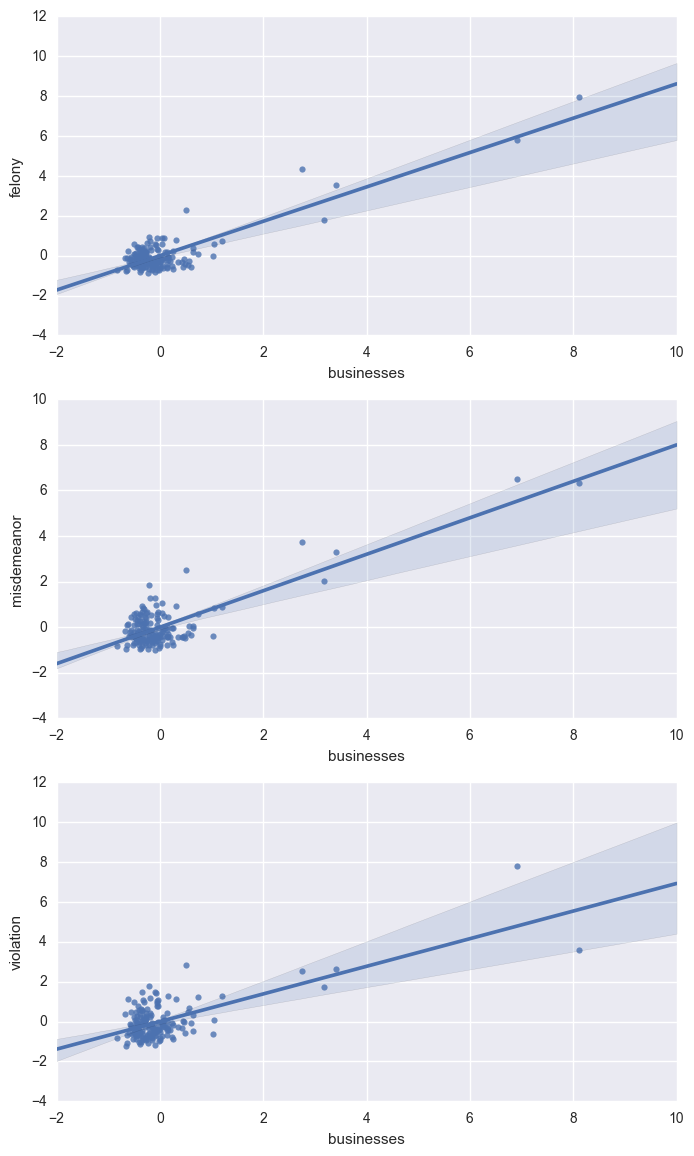

In [23]:
target_list = ['felony', 'misdemeanor', 'violation']

fig = plt.figure(figsize=(8, 14))
for i in range(3):
    fig.add_subplot(3, 1, i + 1)
    ax = sns.regplot(x='businesses', y=target_list[i], data=df3_new)
    ax.set_xlabel('businesses')
    ax.set_ylabel(str(target_list[i]))
plt.show()